### bias vs variance : 
    bias - error rate between true values and predicted values
    
    variance - how much spread out the data is

# loading the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

df = pd.read_csv(r"./Boston_Housing_Dataset.csv")
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# deleting duplicate entries : 

In [2]:
# removing duplicate columns
qwe= pd.DataFrame()
qwe['asd'] = [i for i in range(10)]
qwe['zxc'] = [i for i in range(10)]
qwe['qwe'] = [i*10 for i in range(10)]

qwe = qwe.T.drop_duplicates().T
qwe.head(2)

,asd,qwe
0,0,0
1,1,10


In [3]:
# removing duplicate rows
qwe= pd.DataFrame()
qwe['asd'] = [0, 1, 1, 2, 3, 4, 5, 6, 7]
qwe['zxc'] = [0, 1, 1, 45, 23, 2, 12, 23, 34]
qwe['qwe'] = [0, 1, 1, 34, 3, 4, 34, 34, 34]

qwe = qwe.drop_duplicates()
qwe.head()

,asd,zxc,qwe
0,0,0,0
1,1,1,1
3,2,45,34
4,3,23,3
5,4,2,4


# splitting the data

In [2]:
# splitting the dataset
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(df.drop(columns = ['PRICE', 'Unnamed: 0']), df.PRICE, test_size=0.2, random_state=1)

In [5]:
# stratified split

# easy way
data = pd.read_csv('./train.csv')
x = data.drop(['Survived'], axis = 1)
y = data.Survived
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x, y, test_size=0.2, stratify=y, random_state=1)
# 'stratify' parameter will split the dataset in the same ratio as the ratio of classes in the 'y'(target) variable.
y.value_counts() / len(data), ytest1.value_counts() / len(ytest1)

# if we have data for regression(continuous values), then we can perform strafied split by creating a column where we specify the category value based on the upper limit and lower limit and then use that column to perform strafied split. the example is provided in the next cell.

(0    0.616162
 1    0.383838
 Name: Survived, dtype: float64,
 0    0.614525
 1    0.385475
 Name: Survived, dtype: float64)

In [6]:
# hard way using StratifiedShuffleSplit()
from sklearn.model_selection import StratifiedShuffleSplit

df['price_category'] = pd.cut(df.PRICE, bins = 9, labels=[i for i in range(1, 10)])

# now can perform stratified split based on the 'price_category' column
split = StratifiedShuffleSplit(test_size = 0.2, random_state=1).split(df, df.price_category)

for train, test in split:
    xtrain_stratified = df.drop(columns = ['PRICE', 'price_category']).iloc[train]
    ytrain_stratified = df.PRICE.iloc[train]
    xtest_stratified = df.drop(columns = ['PRICE', 'price_category']).iloc[test]
    ytest_stratified = df.PRICE.iloc[test]

# encoding categorical variables

In [7]:
# there are 2 types of encoding : one encoding where all the classes of a feature are treated with equal weight, for this we use 'OneHotEncoding' and 'pandas.get_dummies()'. another type of encoding is where the classes of a feature are encoded based on rank, for this we use 'OrdinalEncoder()', 'LabelEncoder()' and 'pandas.DataFrame.cat.codes()' . 
# 

# for example, let's consider there is a feature which consist of job position(CEO, manager, junior, etc), here we can't use OneHotEncoding() because we know that 'CEO' is more important than 'manager' so we should give more weight to the 'CEO'. in this situation, we can use 'OrdinalEncoder()'

# OneHotEncoding() : 
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop = 'first', sparse_output = False)  # 'drop_first' parameter will drop first column from the result. for example, here we have encoded sex column which has 2 types of values, which means it will return 2 columns for when 'drop_first' is True, we will get only 1 column which saves memory and training time.
xtrain_onehotencoded = encoder.fit_transform(xtrain1[['Sex']])  
xtest_onehotencoded = encoder.transform(xtest1[['Sex']])
                                        
new_train_df = pd.DataFrame(xtrain_onehotencoded, columns=encoder.get_feature_names_out())
new_test_df = pd.DataFrame(xtest_onehotencoded, columns = encoder.get_feature_names_out())

xtrain1 = pd.concat([xtrain1, new_train_df], axis = 1)
xtest1 = pd.concat([xtest1, new_test_df], axis =1)

# pandas.get_dummies() : 
for i in ['Sex', 'Embarked']:
    dummies = pd.get_dummies(xtrain1[i], prefix=i)
    xtrain1 = pd.concat([xtrain1, dummies], axis = 1)


# OrdinalEncoder()
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
xtrain1['sex_ordinalencoded'] = encoder.fit_transform(xtrain1[['Sex']])
xtest1['sex_ordinalencoded'] = encoder.transform(xtest1[['Sex']])

# mapping specific values. this is done to ensure that the data is not encoded randomly and to give important values higher weights. for example, we need to give 'Phd' higher value than 'Bsc' so that model will give higher weight to 'Phd'

encoder = OrdinalEncoder(categories=[[np.nan, 'male', 'female']], dtype = np.int8, encoded_missing_value=9999) # here 'nan', 'male', 'female' will be mapped to 0, 1, 2 respectively
xtrain1['map_sex_ordinalencoded'] = encoder.fit_transform(xtrain1[['Sex']])
xtest1['map_sex_ordinalencoded'] = encoder.transform(xtest1[['Sex']])

# you can also perform encoding like this(using map()):
xtrain1['map_sex_map'] = xtrain1.Sex.map({'male' : 123, 'female' : 456, np.nan : 999}) 


# LabelEncoder()
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
xtrain1['sex_labelencoder'] = encoder.fit_transform(xtrain1['Sex'])
xtest1['sex_labelencoder'] = encoder.transform(xtest1['Sex'])

# pandas.DataFrame.cat.codes
xtrain1['sex_catcodesencoded'] = xtrain1['Sex'].astype('category').cat.codes


# handling missing values
    handling missing values is a tricky job. you have to be creative. 
    first you have to understand the dataset. for example, in titanic dataset, there are few missing values in 'Age' column. so what we can do is we can replace the missing values with mean age of passengers that belong in the same 'ticket_class', because mostly people with older age have more money.

    you can also try to see if there are other columns that are based/ depends on the columns with missing values.

In [8]:
missing_df = pd.read_csv("./train.csv")

In [9]:
#check for missing values
missing_df.isnull().sum()   #you can also use 'isna()' instead of 'isnull()'

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
missing_df.isna().sum() / len(missing_df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [11]:
# deleting the rows or columns with null values : 

    # this is generally not recommended but when majority of your data is missing, you can delete the column. but doing this, you may end up deleting important data. 

# deleting columns

#from the above table you can see that 77.1% of 'Cabin' column is null values. you we can delete that column.
missing_df.drop(['Cabin'], axis = 1)
# include 'inplace = True' parameter to save the changes to original dataframe

# deleting rows with null values : 
asd = missing_df.dropna(axis=0)  #deletes all the rows where 'nan' values are present
# include 'inplace = True' parameter to save the changes to original dataframe

#### missing values of continuous variables : 

In [12]:
# imputation of null values : 
    # there are several way to impute null values.

missing_df_copy1 = missing_df.copy()

#filling null values with median : 
missing_df_copy1['Age']=missing_df_copy1['Age'].fillna(missing_df_copy1['Age'].median())

# filling null values with mode : 
missing_df_copy1['Embarked']=missing_df_copy1['Embarked'].fillna(missing_df_copy1['Embarked'].mode())

# filling null values with mean : most common way. if there are outliers, it needs to be treated first. but its better to use median if there are outliers
missing_df_copy1['Age']=missing_df_copy1['Age'].fillna(missing_df_copy1['Age'].mean())

In [13]:
missing_df_copy2 = missing_df.copy()

# fill forward - replacing the null values with previous values
missing_df_copy2['Age'] = missing_df_copy2['Age'].fillna(method='ffill')

#backward fill - replacing null values with next value.
missing_df_copy2['Embarked'] = missing_df_copy2['Embarked'].fillna(method = 'bfill')

#### missing values of categorical variables : 

In [14]:
missing_df_copy3 = missing_df.copy()

# simpleimputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')
missing_df_copy3['Cabin_simpleimputer'] = imputer.fit_transform(missing_df_copy3[['Cabin']]) 

In [15]:
# knn imputer - knn-imputer takes average of n-neighbours nearest to the missing value.

# we cannot use knn-imputer directlly on categorical variables. so we need to encode the values in such a way that we don't encode the null values.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
values_withoutNull = missing_df_copy3['Cabin'][missing_df_copy3['Cabin'].notnull()]
missing_df_copy3['Cabin_encoded_withoutNull'] = pd.Series(encoder.fit_transform(values_withoutNull), index = values_withoutNull.index)

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1) # keep 'n_neighbors' = 1 for categorical variables otherwise it will return some float values.
missing_df_copy3['Cabin_knnimputer'] = imputer.fit_transform(missing_df_copy3[['Cabin_encoded_withoutNull']])

In [16]:
# iterative imputer - its a multivariate imputation technique. it predicts the missing values by creating a model keeping column with missing values as target variable and other columns as independent features.
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder

missing_df_copy4 = missing_df.copy()
missing_df_copy4.drop(columns = ['Name', 'Ticket'], inplace=True)
missing_df_copy4['Sex']=missing_df_copy4['Sex'].map({'female' : 0, 'male' : 1})
missing_df_copy4['Embarked']=missing_df_copy4['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})

encoder = LabelEncoder()
missing_df_copy4['Cabin'] = pd.Series(encoder.fit_transform(missing_df_copy4['Cabin'][missing_df_copy4['Cabin'].notnull()]), index = missing_df_copy4['Cabin'][missing_df_copy4['Cabin'].notnull()].index)


imputer = IterativeImputer(random_state=1)
imputed = imputer.fit_transform(missing_df_copy4)
df_iterative_imputed = pd.DataFrame(imputed, columns = missing_df_copy4.columns)

# you can use iterative imputer on categorical columns with classification model as estimator
"""    imp_num = IterativeImputer(estimator=RandomForestRegressor(),
                               initial_strategy='mean',
                               max_iter=10, random_state=0)
    imp_cat = IterativeImputer(estimator=RandomForestClassifier(), 
                               initial_strategy='most_frequent',
                               max_iter=10, random_state=0)
""""""

In [17]:
df_iterative_imputed.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1.0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,97.587693,0.0
1,2.0,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,81.000000,1.0


pandas.interpolate() : used to fill missing values

    attributes : 
        method - method to use to fill missing values
        axis - 0 for column or 1 for row
        inteplace - boolean, if true saves the imputed values to the dataframe
        


In [3]:
df = pd.DataFrame([(0.0, np.nan, -1.0, 1.0),
                   (np.nan, 2.0, np.nan, np.nan),
                   (2.0, 3.0, np.nan, 9.0),
                   (np.nan, 4.0, -4.0, 16.0)],
                  columns=list('abcd'))

df

,a,b,c,d
0,0.0,NaN,-1.0,1.0
1,NaN,2.0,NaN,NaN
2,2.0,3.0,NaN,9.0
3,NaN,4.0,-4.0,16.0


In [4]:
df['a'].interpolate(method='linear')

0    0.0
1    1.0
2    2.0
3    2.0
Name: a, dtype: float64

In [10]:
df.interpolate(method='polynomial', order = 1)

,a,b,c,d
0,0.0,NaN,-1.0,1.0
1,1.0,2.0,-2.0,5.0
2,2.0,3.0,-3.0,9.0
3,NaN,4.0,-4.0,16.0


In [13]:
df.interpolate(method = 'index')

,a,b,c,d
0,0.0,NaN,-1.0,1.0
1,1.0,2.0,-2.0,5.0
2,2.0,3.0,-3.0,9.0
3,2.0,4.0,-4.0,16.0


In [15]:
df.interpolate(method = 'nearest')

,a,b,c,d
0,0.0,NaN,-1.0,1.0
1,0.0,2.0,-1.0,1.0
2,2.0,3.0,-4.0,9.0
3,NaN,4.0,-4.0,16.0


In [18]:
df.interpolate(method = 'zero')

,a,b,c,d
0,0.0,NaN,-1.0,1.0
1,0.0,2.0,-1.0,1.0
2,2.0,3.0,-1.0,9.0
3,NaN,4.0,-4.0,16.0


In [19]:
df.interpolate(method = 'bfill')

,a,b,c,d
0,0.0,2.0,-1.0,1.0
1,2.0,2.0,-4.0,9.0
2,2.0,3.0,-4.0,9.0
3,NaN,4.0,-4.0,16.0


In [20]:
df.interpolate(method = 'ffill')

,a,b,c,d
0,0.0,NaN,-1.0,1.0
1,0.0,2.0,-1.0,1.0
2,2.0,3.0,-1.0,9.0
3,2.0,4.0,-4.0,16.0


# scaling 

        scaling is used to bring all the numberical values in the dataset to the same scale. so, scaling won't affect the shape of the data only affects the range.

        while applying scaling, you should only fit the scaler to the train dataset.

In [18]:
# standard scaler - scales the values where the resultant data has mean = 0 and standard deviation = 1
# formula :             x = (x - x.mean) / x.standard_deviation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain_std = scaler.fit_transform(xtrain)
xtest_std = scaler.transform(xtest)

In [19]:
# min-max scaler - scales the values with range as 0, 1 where the smallest value get 0 and biggest value  gets 1 and all the other values are between 0 and 1.
# formula :                 x = (x - x.min) / (x.max - x.min)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(xtrain)
xtrain_minmax = scaler.transform(xtrain)
xtest_minmax = scaler.transform(xtest)

In [20]:
# robust scaler - scaling technique that is robust to outliers.
#           formula :   (x - x.median) / IQR
            # where IQR = 75th quantile - 25th quantile
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
xtrain_robust = scaler.fit_transform(xtrain)
xtest_robust = scaler.transform(xtest)

# normalization and transformation : 

    normalization is used to normalize the data, i.e., to make the distribution of the data consistent(normalizing the skewness)

    you can select the best transformation technique based on the qqplot, histogram and kernal density estimation plot.

    for qqplot, more the dots on the line, better the technique.

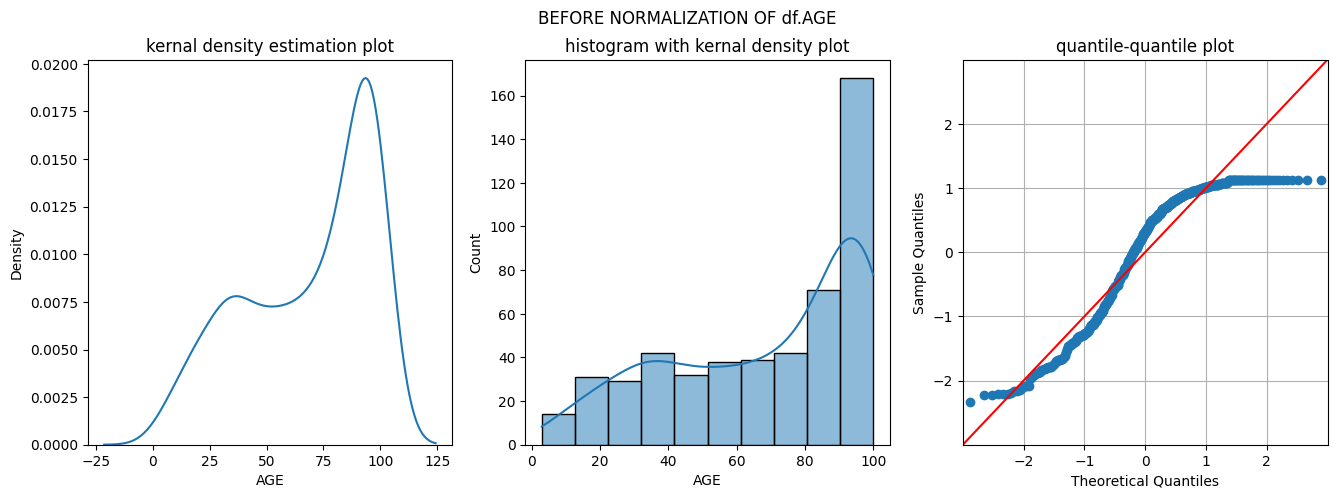

In [21]:
# for qqplot
from statsmodels.api import qqplot
import scipy.stats as stats

fig, ax = plt.subplots(nrows = 1, ncols=3, figsize = (16, 5))
sns.kdeplot(df.AGE, ax = ax[0])
ax[0].set_title("kernal density estimation plot")
sns.histplot(df.AGE, kde=True, ax= ax[1])
ax[1].set_title("histogram with kernal density plot")
qqplot(df.AGE, line= '45', fit = True, dist = stats.norm, ax = ax[2])
ax[2].set_title('quantile-quantile plot')

plt.suptitle("BEFORE NORMALIZATION OF df.AGE")
plt.grid()
plt.show()

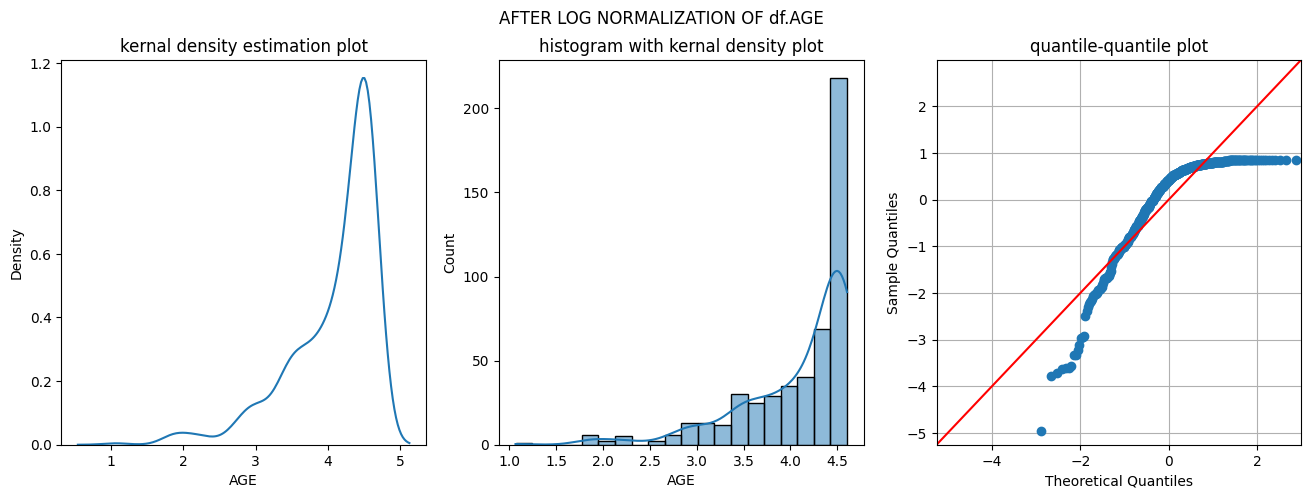

In [22]:
#  log normalization
age_norm = np.log(df.AGE)

fig, ax = plt.subplots(nrows = 1, ncols=3, figsize = (16, 5))
sns.kdeplot(age_norm, ax = ax[0])
ax[0].set_title("kernal density estimation plot")
sns.histplot(age_norm, kde=True, ax= ax[1])
ax[1].set_title("histogram with kernal density plot")
qqplot(age_norm, line= '45', fit = True, dist = stats.norm, ax = ax[2])
ax[2].set_title('quantile-quantile plot')

plt.suptitle("AFTER LOG NORMALIZATION OF df.AGE")
plt.grid()
plt.show()

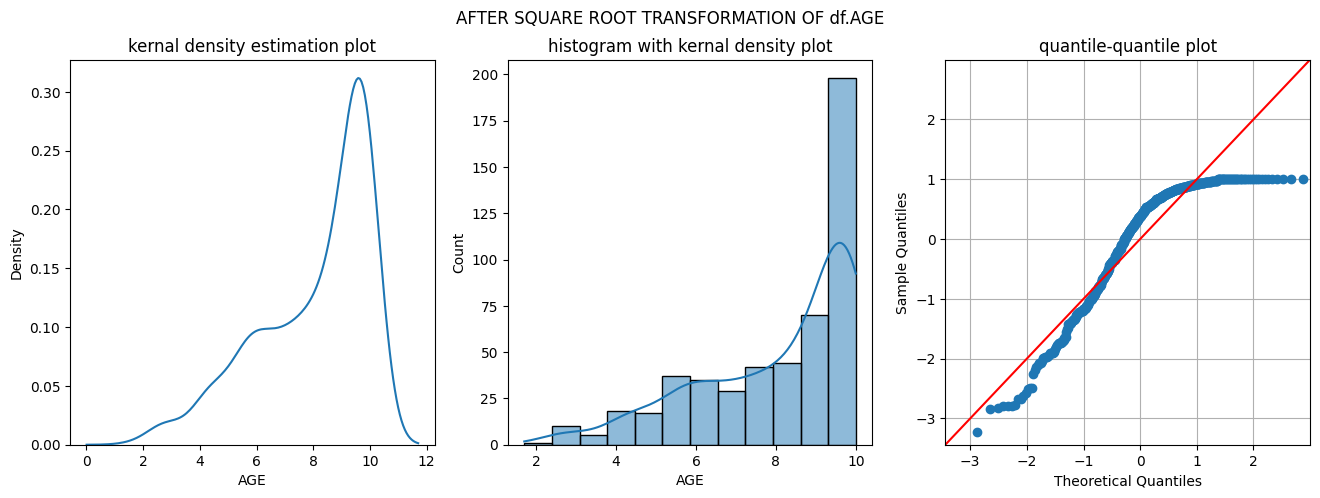

In [23]:
# square root transformation
age_sqrt = df.AGE ** (1/2)

fig, ax = plt.subplots(nrows = 1, ncols=3, figsize = (16, 5))
sns.kdeplot(age_sqrt, ax = ax[0])
ax[0].set_title("kernal density estimation plot")
sns.histplot(age_sqrt, kde=True, ax= ax[1])
ax[1].set_title("histogram with kernal density plot")
qqplot(age_sqrt, line= '45', fit = True, dist = stats.norm, ax = ax[2])
ax[2].set_title('quantile-quantile plot')

plt.suptitle("AFTER SQUARE ROOT TRANSFORMATION OF df.AGE")
plt.grid()
plt.show()

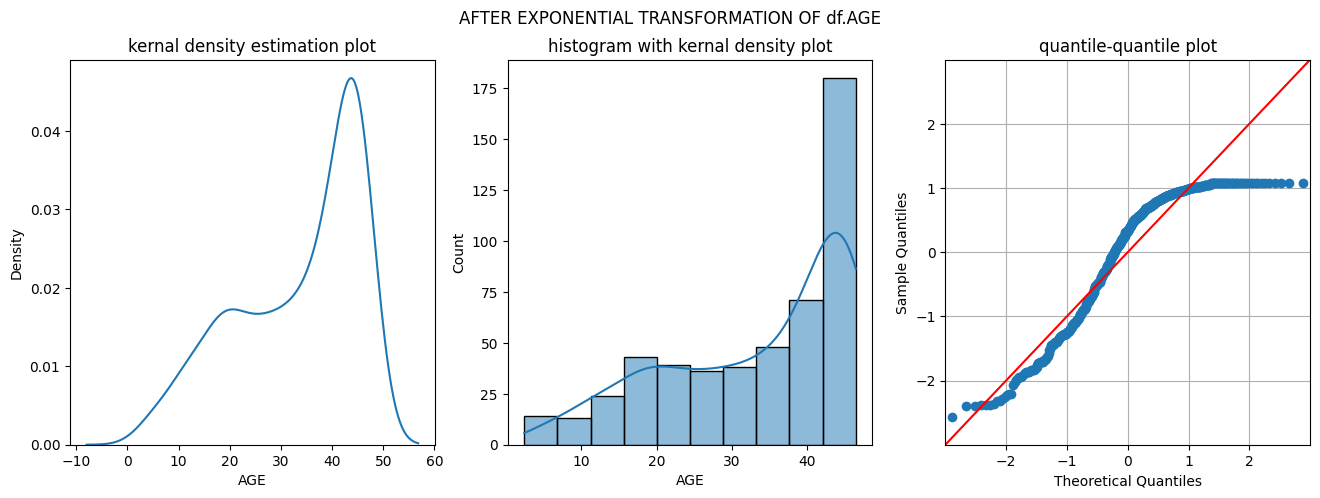

In [24]:
# exponential transformation
age_exp = df.AGE ** (1/1.2)

fig, ax = plt.subplots(nrows = 1, ncols=3, figsize = (16, 5))
sns.kdeplot(age_exp, ax = ax[0])
ax[0].set_title("kernal density estimation plot")
sns.histplot(age_exp, kde=True, ax= ax[1])
ax[1].set_title("histogram with kernal density plot")
qqplot(age_exp, line= '45', fit = True, dist = stats.norm, ax = ax[2])
ax[2].set_title('quantile-quantile plot')

plt.suptitle("AFTER EXPONENTIAL TRANSFORMATION OF df.AGE")
plt.grid()
plt.show()

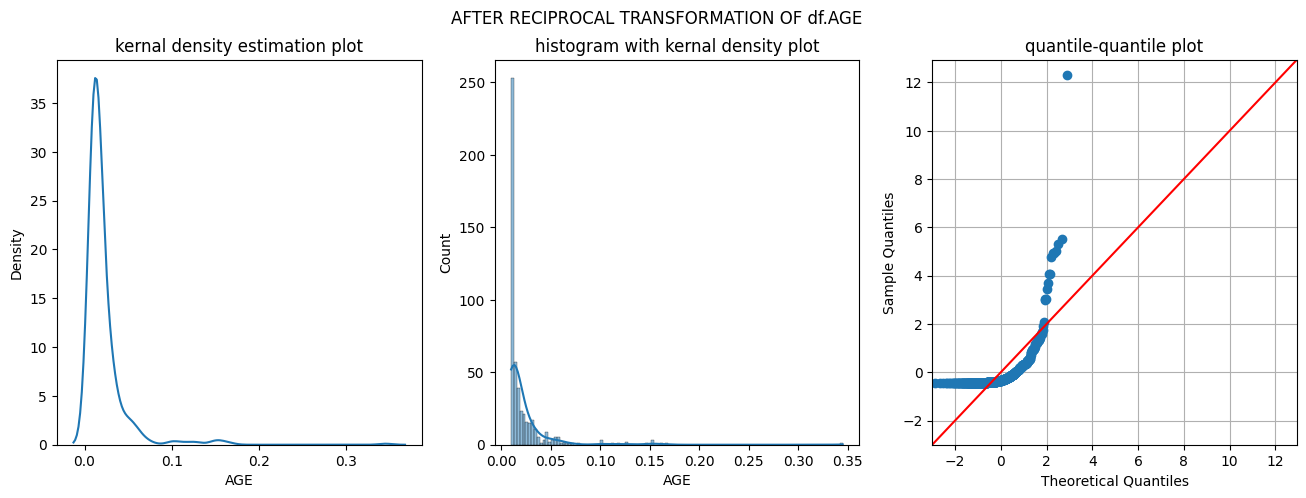

In [25]:
# reciprocal transformation
age_reci = df.AGE.apply(lambda x :  (1/x))

fig, ax = plt.subplots(nrows = 1, ncols=3, figsize = (16, 5))
sns.kdeplot(age_reci, ax = ax[0], warn_singular=False)
ax[0].set_title("kernal density estimation plot")
sns.histplot(age_reci, kde=True, ax= ax[1])
ax[1].set_title("histogram with kernal density plot")
qqplot(age_reci, line= '45', fit = True, dist = stats.norm, ax = ax[2])
ax[2].set_title('quantile-quantile plot')

plt.suptitle("AFTER RECIPROCAL TRANSFORMATION OF df.AGE")
plt.grid()
plt.show()

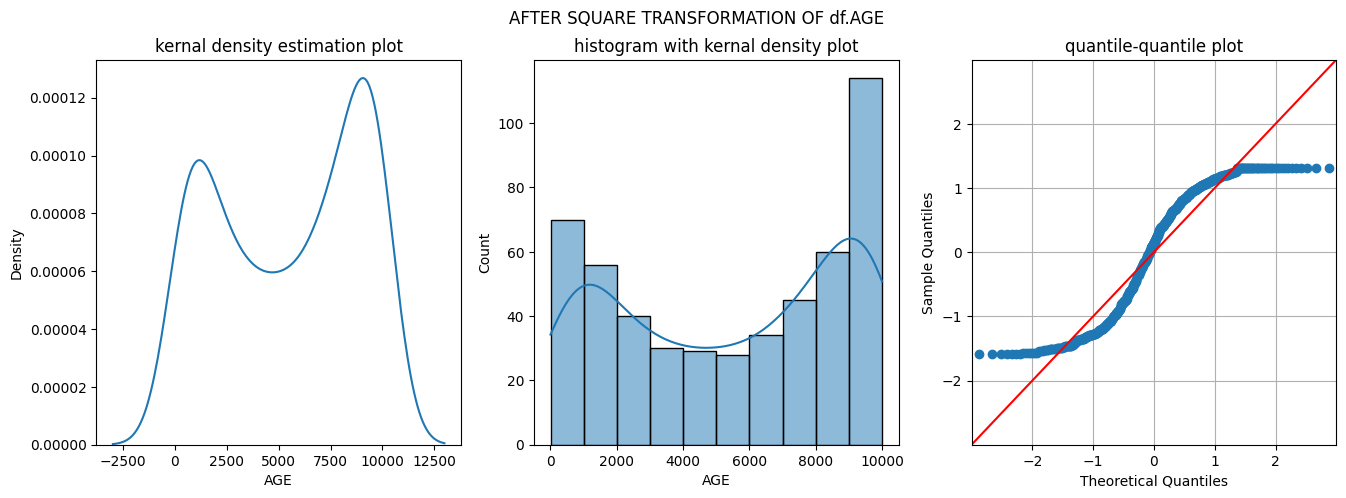

In [26]:
# square transformation
age_squ = df.AGE ** 2

fig, ax = plt.subplots(nrows = 1, ncols=3, figsize = (16, 5))
sns.kdeplot(age_squ, ax = ax[0], warn_singular=False)
ax[0].set_title("kernal density estimation plot")
sns.histplot(age_squ, kde=True, ax= ax[1])
ax[1].set_title("histogram with kernal density plot")
qqplot(age_squ, line= '45', fit = True, dist = stats.norm, ax = ax[2])
ax[2].set_title('quantile-quantile plot')

plt.suptitle("AFTER SQUARE TRANSFORMATION OF df.AGE")
plt.grid()
plt.show()

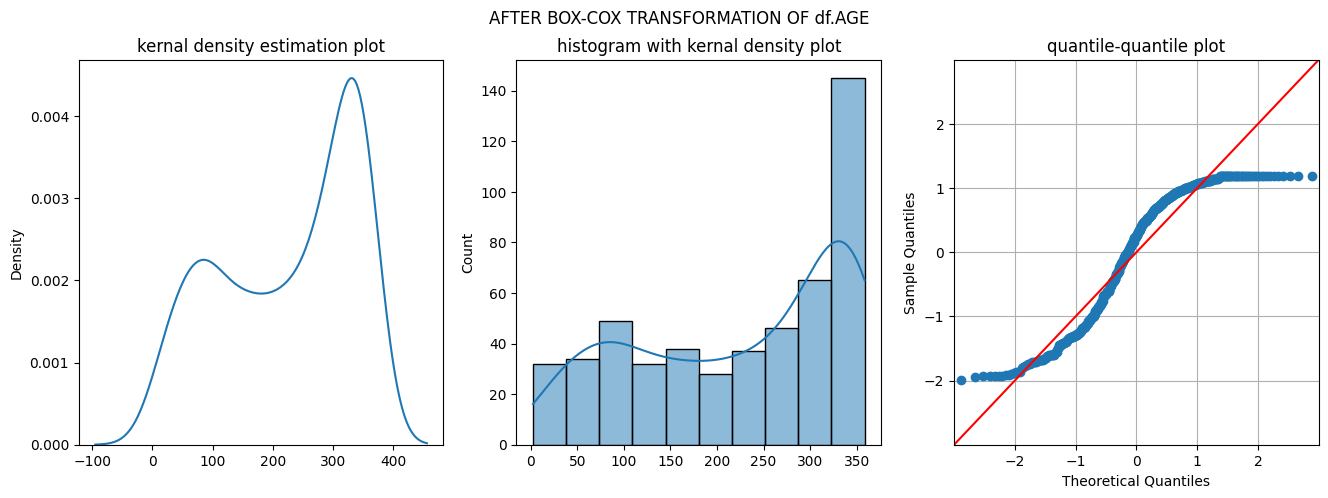

In [27]:
# box-cox transformation
from scipy.stats import boxcox
age_bcx = boxcox(df.AGE)

fig, ax = plt.subplots(nrows = 1, ncols=3, figsize = (16, 5))
sns.kdeplot(age_bcx[0], ax = ax[0], warn_singular=False)
ax[0].set_title("kernal density estimation plot")
sns.histplot(age_bcx[0], kde=True, ax= ax[1])
ax[1].set_title("histogram with kernal density plot")
qqplot(age_bcx[0], line= '45', fit = True, dist = stats.norm, ax = ax[2])
ax[2].set_title('quantile-quantile plot')

plt.suptitle("AFTER BOX-COX TRANSFORMATION OF df.AGE")
plt.grid()
plt.show()

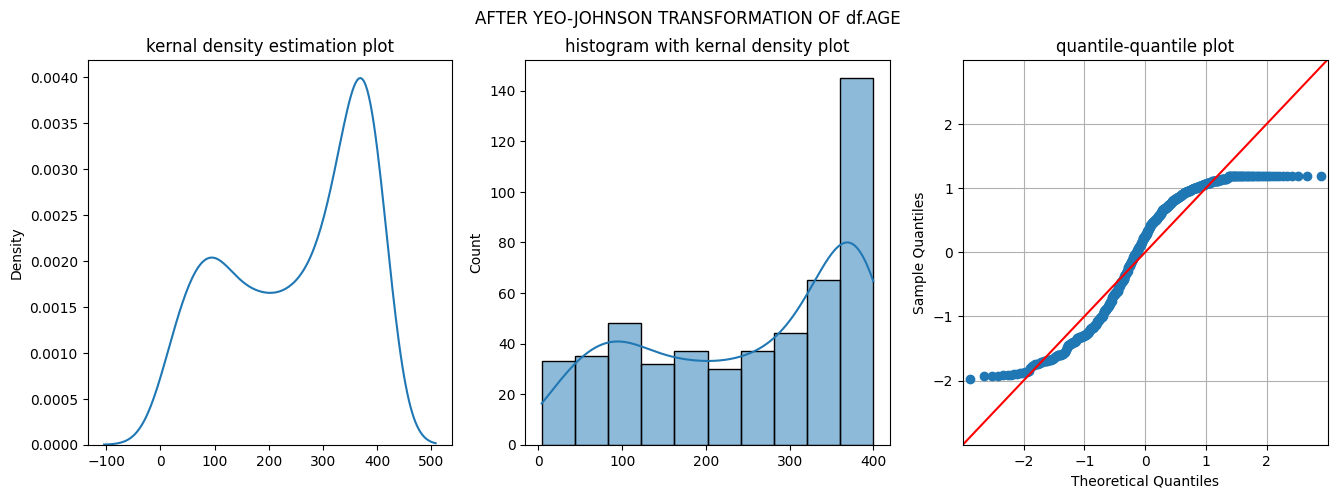

In [28]:
# yeo-johnson transformation
from scipy.stats import yeojohnson
age_yeo = yeojohnson(df.AGE)

fig, ax = plt.subplots(nrows = 1, ncols=3, figsize = (16, 5))
sns.kdeplot(age_yeo[0], ax = ax[0])
ax[0].set_title("kernal density estimation plot")
sns.histplot(age_yeo[0], kde=True, ax= ax[1])
ax[1].set_title("histogram with kernal density plot")
qqplot(age_yeo[0], line= '45', fit = True, dist = stats.norm, ax = ax[2])
ax[2].set_title('quantile-quantile plot')

plt.suptitle("AFTER YEO-JOHNSON TRANSFORMATION OF df.AGE")
plt.grid()
plt.show()

use of violin plots


box plot can be useful to see the distribution of the numberical values. 

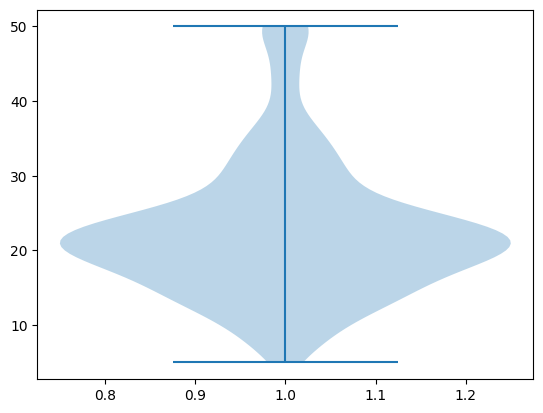

In [30]:
plt.violinplot(df['PRICE'])   # higher the width of the violin plot, more the frequency of the data value. for example, in the below plot, value '20' has the most frequency th eplot is widest at that point
plt.show()

[]

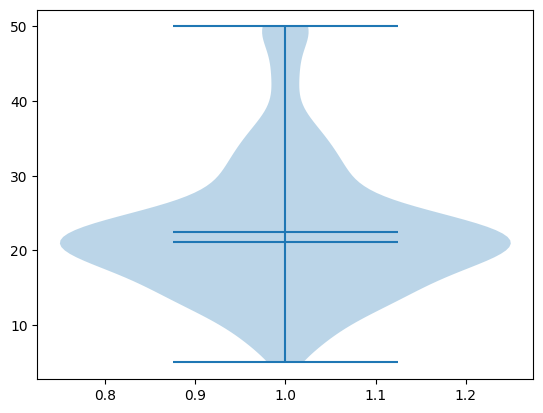

In [31]:
plt.violinplot(df['PRICE'], showmeans=True, showmedians=True) #show mean and median lines. here we can notice that median and mean value for this data is pretty close.
plt.show() 

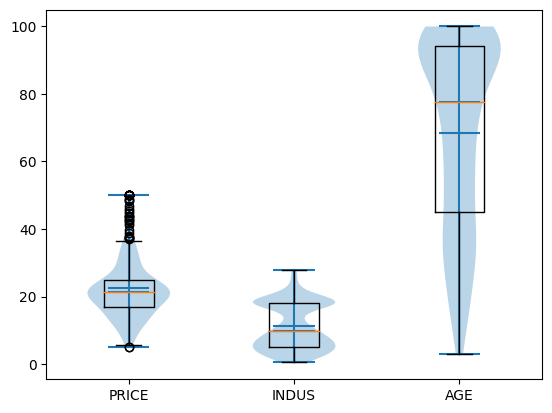

In [36]:
# violin plot with box plot

plt.violinplot(df[['PRICE', 'INDUS', 'AGE']], showmeans=True, showmedians=True, showextrema=True)
plt.boxplot(df[['PRICE', 'INDUS', 'AGE']])
plt.xticks(ticks = [1, 2, 3], labels=['PRICE', 'INDUS', 'AGE'])
plt.show()

# handling outliers
    outliers - odd data point(datapoints that are significantly different from the rest of the data.)
    
    we treat outlier because it affects the mean, median and mode of the data. our model also gets affected from outliers.

    NOTE : just because you see outliers in your data, doesnt mean that you should delete it. instead try to use the outliers because there is outlier because there is some kind of anomaly causing it. try to see if there is some kind of pattern in the outliers like extraordinary sales occur during christmas, etc

NOTE : always remove outliers before splitting the dataset

do analysis before and after handling outliers

#### detecting the outliers

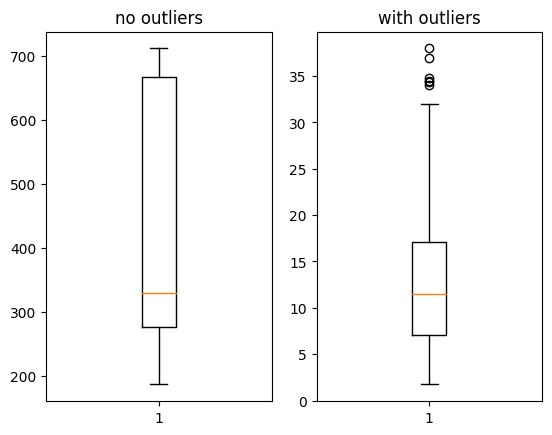

In [46]:
# box plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows = 1, ncols=2)
ax[0].boxplot(xtrain['TAX'])
ax[0].set_title('no outliers')
ax[1].boxplot(xtrain['LSTAT'])
ax[1].set_title('with outliers')

plt.show()

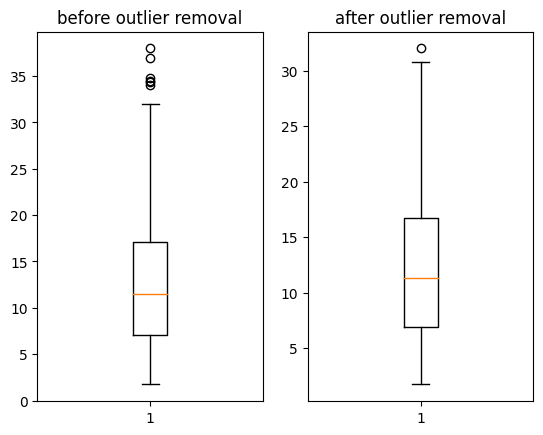

In [52]:
# detecting outliers using IQR

# all the data points that are outside (1st quanlite - n * IQR ,  3rd quantile +  n * IQR) is considered as outliers. here 'n' is generally 1.5, but if your data is more sensitive then 'n' can also be greater then    1.5 
# where,
        # IQR = 3rd quantile - 1st quantile



# removing the outliers : 

q1 = xtrain['LSTAT'].quantile(0.25)
q3 = xtrain['LSTAT'].quantile(0.75)
iqr = q3-q1
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5 * iqr)
lstat_withoutoutliers = xtrain['LSTAT'][(xtrain['LSTAT'] > lower_limit) & (xtrain['LSTAT'] < upper_limit)]

fig, ax = plt.subplots(nrows = 1, ncols=2)
ax[0].boxplot(xtrain['LSTAT'])
ax[0].set_title('before outlier removal')
ax[1].boxplot(lstat_withoutoutliers)
ax[1].set_title('after outlier removal')

plt.show()

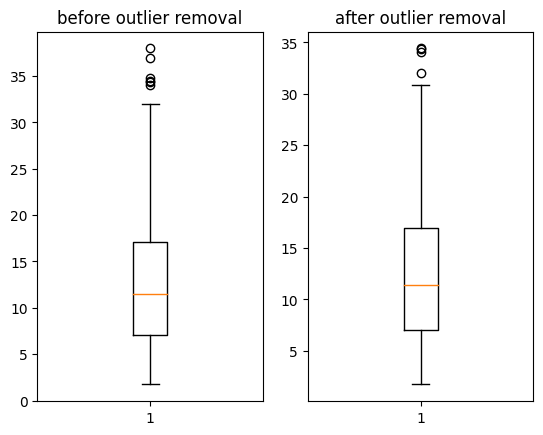

In [54]:
#detecting outliers using standard deviation

# datapoints outside of  μ +/- (3 * σ) are considered outliers. 

# removing outliers using standard deviation
lstat = xtrain['LSTAT']
mean = lstat.mean()
standard_deviation = lstat.std()

upper_limit = mean + (3*standard_deviation)
lower_limit = mean - (3*standard_deviation)

lstat_withoutoutliers = [i for i in lstat if i > lower_limit and i < upper_limit]

fig, ax = plt.subplots(nrows = 1, ncols=2)
ax[0].boxplot(xtrain['LSTAT'])
ax[0].set_title('before outlier removal')
ax[1].boxplot(lstat_withoutoutliers)
ax[1].set_title('after outlier removal')

plt.show()


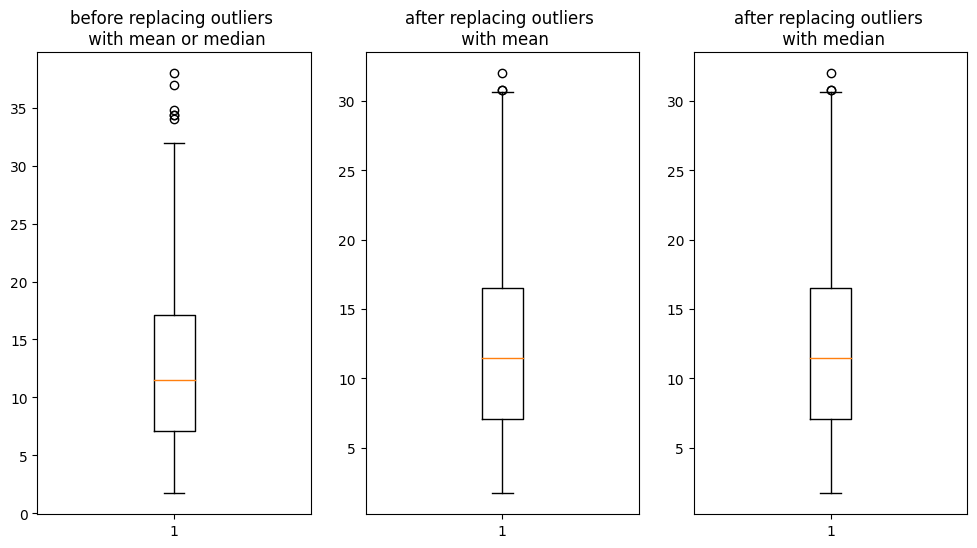

In [60]:
# it not necessary to always remove the outliers because the data is deleted. instead we can replace the outlier value with mean/median.


q1 = xtrain['LSTAT'].quantile(0.25)
q3 = xtrain['LSTAT'].quantile(0.75)
iqr = q3-q1
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5 * iqr)

lstat = xtrain['LSTAT']
# replacing outliers with mean
lstat_mean = [i if i < upper_limit and i > lower_limit else lstat.mean() for i in lstat]

# replacing outliers with median
lstat_median = [i if i < upper_limit and i > lower_limit else lstat.median() for i in lstat]

# NOTE : it's not preferred to replace the outliers with mean because 'mean' gets affected due to outliers, so median is used instead.


fig, ax = plt.subplots(nrows = 1, ncols=3, figsize = (10, 6))
ax[0].boxplot(xtrain['LSTAT'])
ax[0].set_title('before replacing outliers \n with mean or median')
ax[1].boxplot(lstat_mean)
ax[1].set_title('after replacing outliers \n with mean')
ax[2].boxplot(lstat_median)
ax[2].set_title('after replacing outliers \n with median')

plt.show()

why it is not recommended to use mean value to replace the outliers?

because mean gets affected due to outliers but median isn't. for example, consider salary of 100 people in a neighbourhood, there will be extreme outlier if bill gates also lives there. so, if you use mean to replace the outliers, you will find that the mean is also extremely high because the salary of bill gates is very high as compared to others. so, we replace the outliers with median

#### outlier detection using z-score

$$
\Large z = \frac{x - \mu}{\sigma}
$$

In [ ]:
# most common threshold for z-score is 2.5 but you can use other threshold using your domain knowledge and data

# we will remove everything that is less than -2.5 and +2.5
# example code  :
    # def zscore(df, degree=3):
        # data = df.copy()
        # data['zscore'] = (data - data.mean())/data.std()
        # outliers = data[(data['zscore'] <= -degree) | (data['zscore'] >= degree)]
        
        # return outliers['value'], data

    # threshold = 2.5
    # outliers, transformed = zscore(tx, threshold)

# handling imbalanced dataset

In [30]:
# when the classes of target variable is imbalanced, we can balance the classes using 'under smapling' and 'over sampling' techniques. this is done to ensure that our model does not give more weight to the class that have higher frequency.

# NOTE : always encode the categorical variables and handle missing values before sampling.

# under sampling - in this technique, we keep the minority classes as it is and reduce the size of majority class(i.e., we delete some frequency of majority class and keep minority class untouched)

df_sampling = pd.read_csv('./train.csv')
df_sampling.drop(columns = ['Age', 'Cabin', 'Embarked', 'Name', 'Sex', 'Ticket'], inplace=True)
x = df_sampling.drop(columns = ['Survived'])
y = df_sampling['Survived']
xtrainsample, xtestsample, ytrainsample, ytestsample = train_test_split(x, y, test_size= 0.2, random_state=1)

from imblearn.under_sampling import NearMiss

under_sample = NearMiss(sampling_strategy=0.8) #NearMiss() takes a float value 'n' within range 0-1, resulting output will be    len(minority_class) + n% * len(majority_class).
#  'version' parameter accepts 3 values(numbers 1, 2 and 3) : 
    # for version = 1 (default): selects the values with minimum average distance to the three closest minority class and rest are deleted
    # for version = 2 : selects the values with minimum average distance to 3 farthest minority class and rest are deleted
    # for version = 3 : selects the values with minimum distance to each minority class and rest are deleted.

xtrain_undersampled, ytrain_undersampled = under_sample.fit_resample(xtrainsample, ytrainsample) # perform sampling only on training dataset.

# NOTE : avoid using this technique, espically when you don't have large dataset as the data is deleted. instead use over sampling techniques.


# over sampling : in this sampling technique, we increase the frequency of the minority classes of the target variable by duplicating the values of minority class

# RandomOverSampler()
from imblearn.over_sampling import RandomOverSampler

random_oversampler = RandomOverSampler(sampling_strategy=0.8) # RandomOverSampler() accepts a float value 'n' within range 0-1, the resulting output will be      len(majority_class) + [n% * len(minority_class) + len(minority_class)]
xtrain_randomoversampler, ytrain_randomoversampler = random_oversampler.fit_resample(xtrainsample, ytrainsample) # perform only on train set.

# SMOTE() - this is more effective then RandomOverSampler() for samll datasets.
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.7)
xtrain_smote, ytrain_smote = smote.fit_resample(xtrainsample, ytrainsample) #perform only on train set

In [31]:
ytrain1.value_counts()

0    439
1    273
Name: Survived, dtype: int64

In [32]:
ytrain_undersampled.value_counts()

0    336
1    269
Name: Survived, dtype: int64

In [33]:
ytrain_randomoversampler.value_counts()

0    443
1    354
Name: Survived, dtype: int64

In [34]:
ytrain_smote.value_counts()

0    443
1    310
Name: Survived, dtype: int64

# feature selection  
    instead of selecting all the independent features, we can select few features that contribute more to the prediction so that the model can train in less time and more accurately. using feature selection can also help in over fitting problem.

In [35]:
# dropping the features that have very low variance - when the feature has very low variance, it means that the values are not changing that much. when variance is 0, all the values in the feature are same
from sklearn.feature_selection import VarianceThreshold
var = VarianceThreshold(threshold=0.05) # removes all the features where the variance is less than 0.05 
new_train = var.fit_transform(xtrain)
new_test = var.transform(xtest)
var.get_support() # returns all the features that has variance higher than the threshold value.


var1 = VarianceThreshold(threshold=0) # removes all the features which have same value 
new_train = var.fit_transform(xtrain)
new_test = var.transform(xtest)

In [ ]:
# easy way to remove highly correlated features : 

def remove_collinear_features(x, threshold):
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []
    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                #print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])
    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)
    print('Removed Columns {}'.format(drops))
    return x

# removes the columns where correlation is greated then threshold
# always crosscheck the columns before and after removing

In [1]:
# feature selection using correlation
    # 1) using correlation matrix 
            # consider there are 3 independent features x1, x2, x3 and a target feature y and the correlation between: 
                    # x1 , y = 0.90
                    # x2 , y = 0.90
                    # x3 , y = 0.90
                    # x1, x2 = 0.90     x2, x3 = 0.90       x3, x1 = .90
            # here, the correlation between all the independent variables and target variables is 0.90 which is great, but notice that the correlation between x1, x2, x3 is 0.90 so that means that each independent feature essentialy carry the same information for the model so we can keep one of the feature and remove the rest.

    # 2) removing the features that have 0 correlation with target variable.

    # 3) using VIF(variance inflation factor)
            # VIF determines the strength of correlation between independent features.
            # if vif = 1, no multicollinearity
            # higher the vif, higher the correlation between independent features.
            # vif > 5, indicates multicollinearity.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
x = df.iloc[:, :-1] #removing the target variable
vif['variables'] = x.columns
vif['vif'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

NameError: name 'pd' is not defined

you can notice that "PTRATIO" vif is 85.14 which is very high so we can remove it and again calculate VIF.

In [37]:
# selectkbest() for regression
    # for regression problems we can use 'f_regression' or 'mutual_info_regression' score functions. 
    # f_regression - f-score for regression.
    # mutual_info_regression - mutual information for a continuous variable.

# selectkbest() for classification
    # for classification problems we can use 'f_classif', 'chi2' and 'mutual_info_classif' score functions.
    # f_classif - ANOVA f-score for classification/categorical data.
    # mutual_info_classif - mutual information for categorical data.
    # chi2 - chi-squared test. only works for categorical data.

#there are more functions like 'SelectPercentile'(Select features based on percentile of the highest scores), 'SelectFpr'(Select features based on a false positive rate test), 'SelectFdr'(Select features based on an estimated false discovery rate), 'SelectFwe'(Select features based on family-wise error rate, 'GenericUnivariateSelect'(Univariate feature selector with configurable mode)

# selecting 'k'  best features that contribute more for the target feature prediction.

from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, mutual_info_regression, f_regression

selector = SelectKBest(score_func=f_regression, k = 10) #returns 10 best features based on chi-square test
best_train = selector.fit_transform(xtrain, ytrain)
best_test = selector.transform(xtest)

# NOTE : you can also use 'sklearn.feature_selection.mutual_info_classif()' and 'sklearn.feature_selection.mutual_info_regression()' to select the best features but its not necessary as we have passed these functions as parameter for 'score_func' in selectkbest(). 

In [38]:
selector.feature_names_in_      #returns all the features passed to the selector.

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype=object)

In [39]:
selector.get_support()      #returns which columns are used. (True - used, False - not used)

array([ True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True, False,  True])

sequential feature selector : selects best 'n' features based on greedy algorithm. 'sequential foreward' and 'sequential backward selection' are 2 most common types.

in 'sequential backward selection', we iteratively remove a feature till we get the best set of 'n' features. for example, let's say that we have 10 features and we need to select 7 best features out of it, first, we calculate accuracy using all 10 features, then we try all the possible combinations of 9(10-1) features. now, we select those 9 features that gives us the best accuracy. then, using those set of 9 features as the base feature, we remove a feature from it and again select those 8 features that gives us the best accuracy. we repeat this process until we get 'n' best features(in our case 7 features)

in 'sequential foreward selection', we start from the 1 feature(individually), then select the feature that gives best accuracy and then we add a feature to it and select the feature that gives best accuracy and again add a feature to it. we continue this process until we get best 'n' features

when to use foreward/ backward selection : consider we want 'n' number of features out of 100, if 'n' is easier to reach from 1, then select foreward selection else select backward selection.



    sequential floating foreward/backward selection : 

sequential floating foreward selection works just like foreward selection that we discussed earlier but here we have an optional step to remove a feature if there is an increase in the accuracy of the model

sequential floating backward selection also works just like backward selection but has an optionl step to remove a previously selected feature if there is an increase in the accuracy of the model.


<!-- ![sequential floating foreward selection.png](<attachment:sequential floating foreward selection.png>) -->

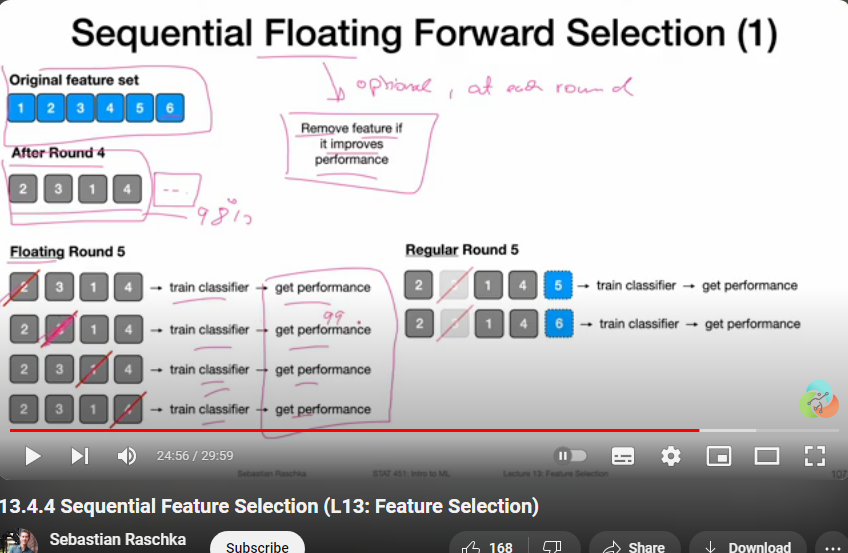

In [12]:
# sklearn.feature_selection.SequentialFeatureSelector

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

model = LinearRegression()
sequential_select = SequentialFeatureSelector(estimator=model, n_features_to_select=10, direction='backward', cv = 5, scoring = 'r2')
result = sequential_select.fit(xtrain, ytrain)

TypeError: SequentialFeatureSelector.__init__() got an unexpected keyword argument 'verbose'

In [ ]:
new_xtrain_sfs = result.transform(xtrain)
new_xtest_sfs = result.transform(xtest)
# before and after transformation
xtrain.shape, xtest.shape, new_xtrain_sfs.shape, new_xtest_sfs.shape

In [10]:
result.get_feature_names_out() #selected feature names

array(['CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
       'LSTAT'], dtype=object)

In [11]:
result.get_support() # selected features

array([ True,  True, False, False,  True,  True, False,  True,  True,
        True,  True,  True,  True])

In [16]:
sfs = SequentialFeatureSelector(model, n_features_to_select='auto', direction = 'forward')
result = sfs.fit(xtrain, ytrain)
result.get_feature_names_out()

array(['NOX', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT'], dtype=object)

RFE(recursive feature elemination) : selects 'n' best features recursively. first a model is trained with all the features and least significant feature is removed. (less weight = less significant). then again a model is trained with remaining features and again the least significant feature is removed. this process is repeated until we are left with desired number of features

* it just selects most relevant features

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(estimator = model, n_features_to_select=9, step = 1) # step = n, removes 'n' features per iteration
result = rfe.fit(xtrain, ytrain)

# NOTE : we can also use RFE inside a pipeline to select best value for 'n'(number of features)

In [28]:
result.get_feature_names_out()

array(['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO',
       'LSTAT'], dtype=object)

In [31]:
result.get_support()

array([ True, False,  True,  True,  True,  True, False,  True,  True,
       False,  True, False,  True])

In [30]:
new_xtrain_rfe = result.transform(xtrain)
new_xtest_rfe = result.transform(xtest)
# before and after transformation
xtrain.shape, xtest.shape, new_xtrain_rfe.shape, new_xtest_rfe.shape

((404, 13), (102, 13), (404, 9), (102, 9))

RFECV(recursive feature elimination with cross validation) : works just like RFE but here optimal number of features to be selected is selected automatically based on the scorer function, whereas in RFE, we will hyperparameter tune to find optimal number of features to be selected

In [32]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

rfecv = RFECV(estimator=model, step = 1, min_features_to_select = 3, cv = 10, scoring = 'r2', verbose = 2)
result = rfecv.fit(xtrain, ytrain)

Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting 

In [36]:
result.get_feature_names_out() # selected feature names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype=object)

In [37]:
result.get_support() 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [39]:
result.score(xtest, ytest)   # reduces xtest to the features selected in RFECV and then predicts and returns the score.

0.763417443213849

In [40]:
new_xtrain_rfecv = result.transform(xtrain)
new_xtest_rfecv = result.transform(xtest)
# before and after transformation
xtrain.shape, xtest.shape, new_xtrain_rfecv.shape, new_xtest_rfecv.shape

((404, 13), (102, 13), (404, 13), (102, 13))

# overfitting and underfitting : 
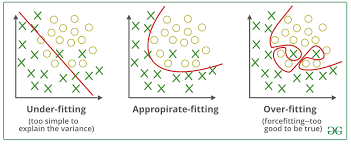

    -> overfitting : happens when the model is overfits in training data. here, the accuracy of the model in train set will be far higher(100% most times) then the accuracy of the model in test set. the model performs poorly in new data(test set)
        - detection : when accuracy(train_set) >>> accuracy(test_set)
        - solution : hyperparameter tuning and EDA(like scaling, etc)

    -> underfitting : happens when the model is performs poorly in both test set and train set. here, the accuracy of the model in test set and in train set are very low.
        - detection : when accuracy(train_set) & accuracy(test_set) both very low
        - solution : using more complex model(eg : replacing linear regression with decision tree regression or replacing decision tree with random forest), increasing the data volumn, etc

## hyperparameter tuning : 

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score, KFold
from skopt import BayesSearchCV

model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)

# you can't use StratifiedKFold with continuous values, but KFold() can be used with both contunuous and categorical values
cv = KFold(n_splits=3, shuffle = True, random_state=1)
print("no hyperparamter tuning : ",cross_val_score(model, xtest, ytest, scoring = make_scorer(mean_squared_error), cv = cv).mean())

params = {
    'max_depth' : [10, 15, 20],
    'min_samples_split' : [3, 7, 10]
}

# gridsearch cv - searching through all the possible combinations
gs = GridSearchCV(model, param_grid=params, scoring = 'neg_mean_squared_error', cv = cv)
gs_result = gs.fit(xtrain, ytrain)
print("\ngrid search result : ", (gs_result.best_params_, gs_result.best_score_, cross_val_score(DecisionTreeRegressor(**gs_result.best_params_), xtest, ytest, scoring = make_scorer(mean_squared_error), cv = cv).mean()))

# randomized search cv - randomly selected combinations in the right directions. if values gives worst results, we don't have to move further in the same direction like GridSearchCV() does.
rs = RandomizedSearchCV(model, param_distributions=params, scoring = 'neg_mean_squared_error', random_state = 1, cv = cv)
rs_result = rs.fit(xtrain, ytrain)
print("\nrandomized search result : ", (rs_result.best_params_, rs_result.best_score_, cross_val_score(DecisionTreeRegressor(**rs_result.best_params_), xtest, ytest, scoring = make_scorer(mean_squared_error), cv = cv).mean()))

# bayes search cv - uses bayesian optimization technique to explore parameters in the right direction. just like randomized search, it wont continue in the direction where the parameters give worst results. another advantage of using bayessearch cv is that we can use large problem spaces and continuous parameter values. it would take GridSearchCV ages to implement what Bayes search cv does
np.int = int
bs = BayesSearchCV(model, params, scoring = 'neg_mean_squared_error',cv = cv, random_state=1)
bs_result = bs.fit(xtrain, ytrain)
print("\nbayes search result : ", (bs_result.best_params_, bs_result.best_score_, cross_val_score(DecisionTreeRegressor(**bs_result.best_params_), xtest, ytest, scoring = make_scorer(mean_squared_error), cv = cv).mean()))

# use sklearn.metrics.get_scorer_names() to get list of all scorers


no hyperparamter tuning :  25.336862745098035

grid search result :  ({'max_depth': 10, 'min_samples_split': 10}, -25.161455655598484, 23.304013330563706)


c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



randomized search result :  ({'min_samples_split': 3, 'max_depth': 15}, -25.797983388612494, 24.426691176470587)


c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\skopt\optimize


bayes search result :  (OrderedDict([('max_depth', 10), ('min_samples_split', 10)]), -25.086516828437993, 23.56540548742645)


confusion matrix

In [13]:
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
# accuracy_score -> returns accuracy
# precision_score -> returns precision
# recall_score -> returns recall
# f1_score -> returns f1-score

data = load_wine()
x = data.data
y = data.target

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

clf = LogisticRegression()
clf.fit(xtrain, ytrain)

ypred = clf.predict(xtest)

print("accuracy score = ", accuracy_score(ytest, ypred))
print("\nclassification report = \n", classification_report(ytest, ypred)) #returns detailed report on the model

accuracy score =  0.9722222222222222

classification report = 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00        11

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
from sklearn.metrics import confusion_matrix
# confusion_matrix(ytest, ypred) #to calculate the confusion matrix

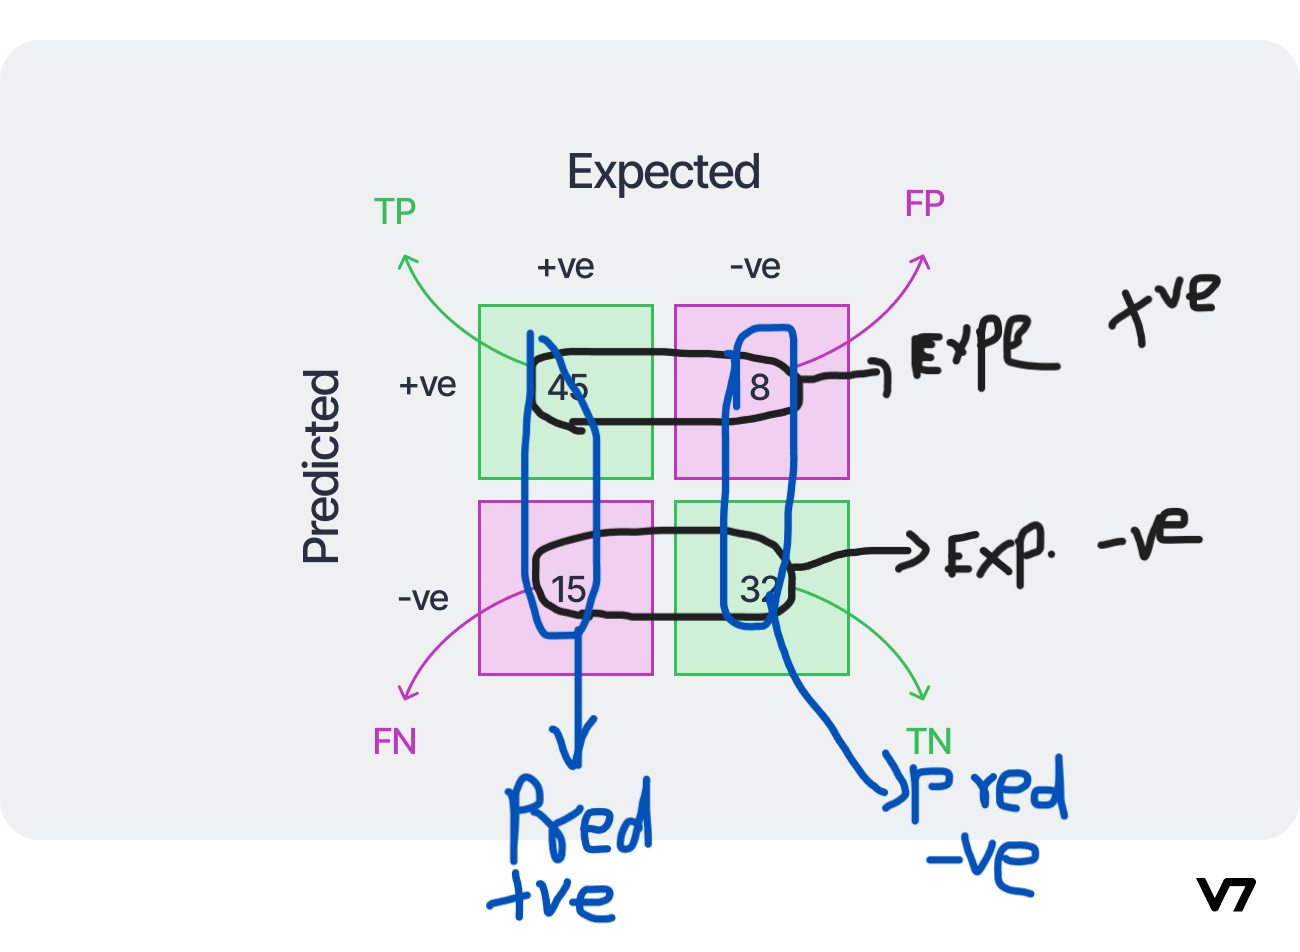

expected positive = total positive in the actual dataset

expected negative = total negative in the actual dataset

predicted positive = total positive the model has predicted positive

predicted negative = total negative the model has predicted negative

TP = TRUE POSITIVE, values that are actually positive and model has also predicted as positive

TN = TRUE NEGATIVE, values that are actually negative and model has also predicted as negative

FP = FALSE POSITIVE, values that are actually negative but the model has predicted as positive

FN = FALSE NEGATIVE, values that are actually positive but the model has predicted as negative



    accuracy : number of samples classified correctly out of all samples 
    (TP + TN) / (TP+TN+FP+FN)

    precision(for positive class) : number of samples that are correctly classified as positive out of all the samples that have been classified as positive
    TP / (TP + FP)

    recall(for positive class) : number of samples that are correctly classified as positive out of all the samples that actually belong to positive class
    TP/ (TP + FN)

    f1-score = (2*precision*recall)/(precision + recall)

    specificity : number of samples that are classified correctly as negative out of all the samples that actually belong to negative class
    TN / (TN+FP)


confusion matrix for multi-class classification

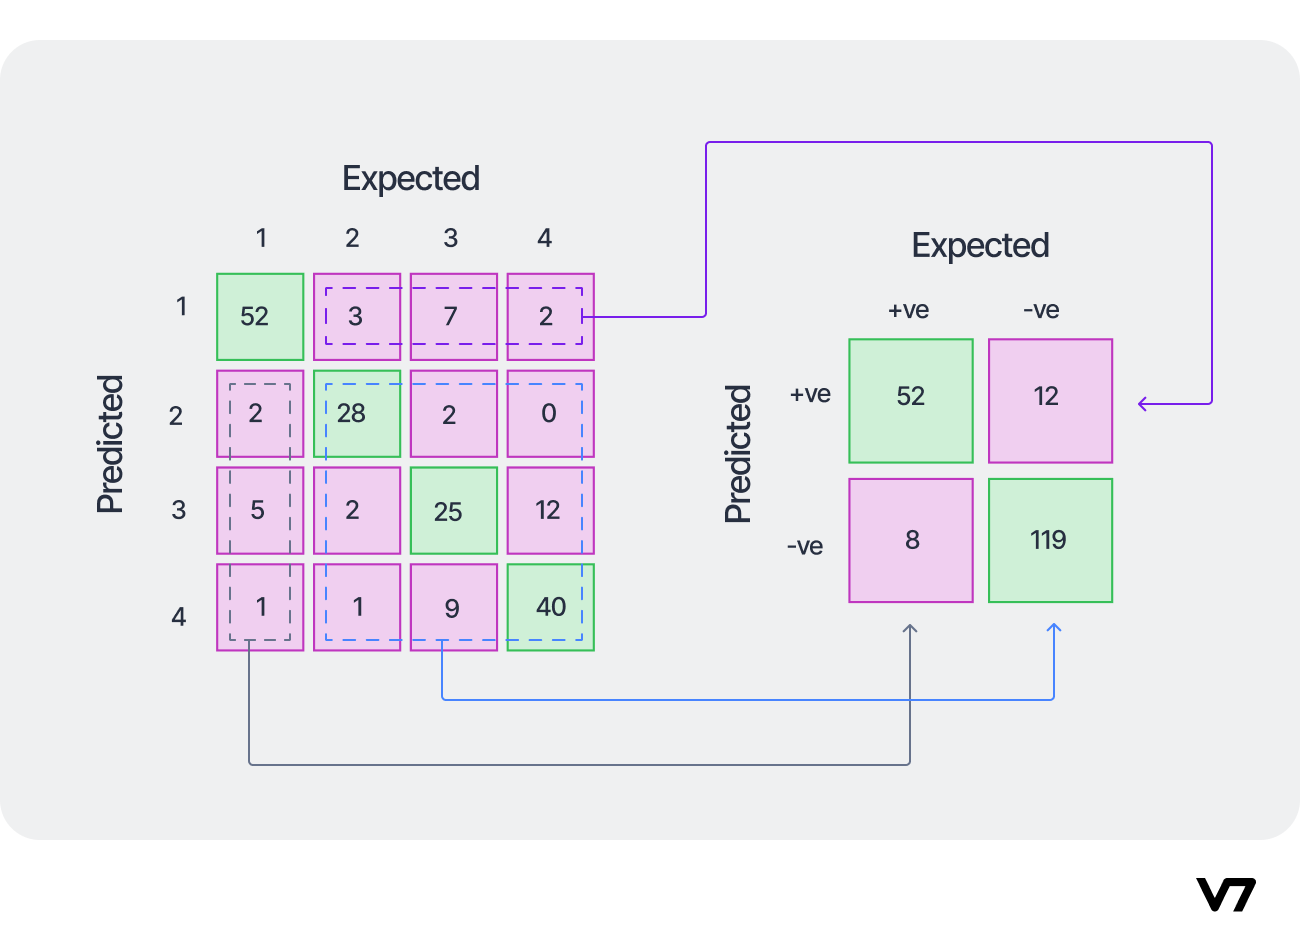

## visualization : 

In [3]:

import pandas as pd
df = pd.read_csv('./train.csv')
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

C:\Users\RAJESH\AppData\Local\Temp\ipykernel_7824\1413895851.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype='bool'))
C:\Users\RAJESH\AppData\Local\Temp\ipykernel_7824\1413895851.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = 'Blues', mask = mask, annot = True)


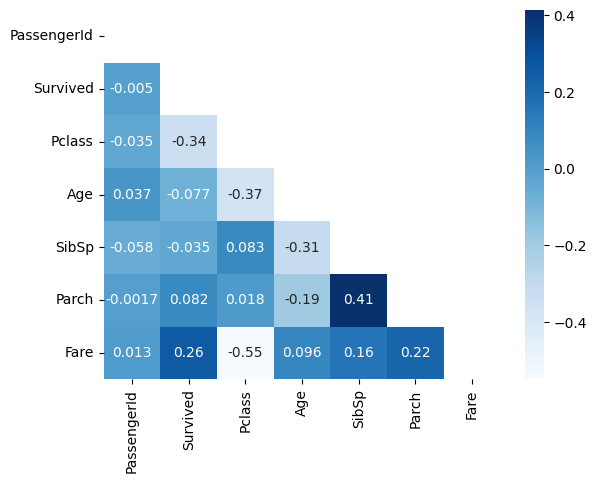

In [7]:
# heat map

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

mask = np.triu(np.ones_like(df.corr(), dtype='bool'))
sns.heatmap(df.corr(), cmap = 'Blues', mask = mask, annot = True)
plt.show()


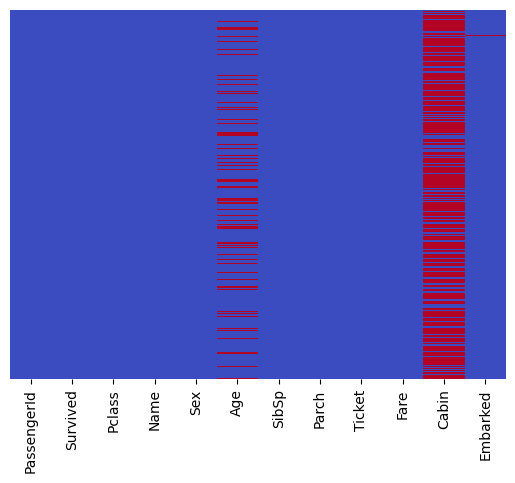

In [11]:
# visualising the pattern in missing values 

sns.heatmap(df.isnull(), cmap = 'coolwarm', cbar = False)
plt.yticks([])
plt.show()

In [13]:
# how to visualize higher dimentional data? we use TSNE to project higher dimensions to 2 dimensions.
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

x, y = load_breast_cancer(return_X_y=True)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

tsne = TSNE(n_components=2, random_state = 1) # 'n_components' = number of dimensions we need
xtrain_tsne = tsne.fit_transform(xtrain)
# TSNE doesnt provide transform() for test data, so we use fit_transform() for test data also
xtest_tsne = tsne.fit_transform(xtest)

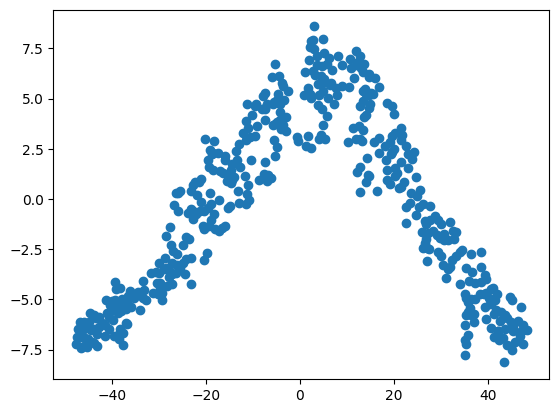

In [14]:
plt.scatter(xtrain_tsne[:,0], xtrain_tsne[:, 1])

NOTE : this is not perfect distrubution of the data, we are just looking at the projection of 30 features in the 2 dimentional space

## UMAP - visualizing higher dimensionality data

In [2]:
from sklearn.datasets import load_iris

x, y = load_iris(return_X_y=True)

before seeing UMAP, we will first visualize using plotly.scatter_matrix(), seaborn.pairpot() and TSNE on the same data

In [3]:
# plotly.scatter_matrix()

import plotly.express as px

df = px.data.iris()
features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]
fig = px.scatter_matrix(df, dimensions=features, color="species")
fig.show()

c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, 

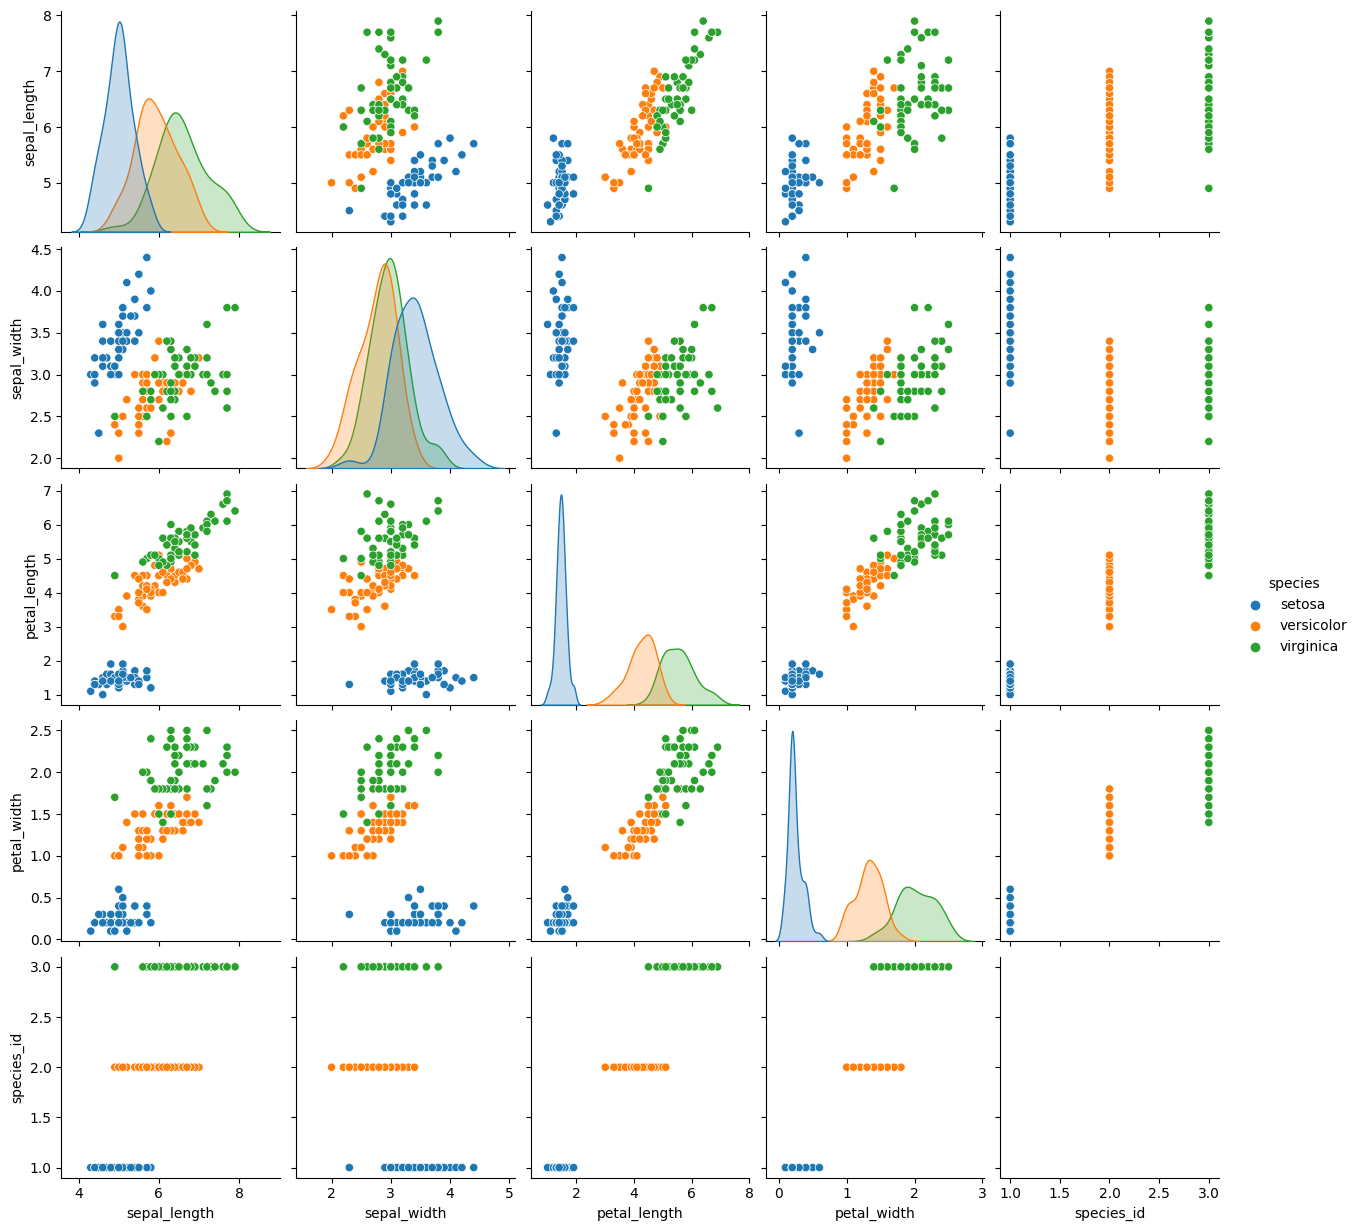

In [6]:
# seaborn.pairplot()

import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df,hue='species')
plt.show()

In [7]:
# using TSNE 2D

from sklearn.manifold import TSNE
import plotly.express as px

df = px.data.iris()

features = df.loc[:, :'petal_width']

tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(features)

fig = px.scatter(
    projections, x=0, y=1,
    color=df.species, labels={'color': 'species'}
)
fig.show()

c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



TSNE has projected the data into 2d but its not able to properly separate the classes

In [8]:
# using TSNE 3D

from sklearn.manifold import TSNE
import plotly.express as px

df = px.data.iris()

features = df.loc[:, :'petal_width']

tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(features, )

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=df.species, labels={'color': 'species'}
)
fig.update_traces(marker_size=8)
fig.show()

c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



you can see that the blobs are not properly separated

now we will visualize using UMAP on the same data

In [9]:
# pip install umap-learn
from umap import UMAP
import plotly.express as px

df = px.data.iris()

features = df.loc[:, :'petal_width']

umap_2d = UMAP(n_components=2, init='random', random_state=0)
umap_3d = UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df.species, labels={'color': 'species'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df.species, labels={'color': 'species'}
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()

c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



you can see that UMAP has able to properly separate the blobs making it a better visualization tool then TSNE

class weights ratio : if the target class is imbalanced, then what we can do is that we can assign weights ratio to the classes so that the model doesnt assign more weights to the majority class. the majority class gets penalised less for the errors made and the minority class gets penalised more for the errors made.

for example : see logistic regression

In [ ]:
# a/b testing, 